# Hypothesis Testing

## Scenarios

- Chemistry - do inputs from two different barley fields produce different
yields?
- Astrophysics - do star systems with near-orbiting gas giants have hotter
stars?
- Economics - demography, surveys, etc.
- Medicine - BMI vs. Hypertension, etc.
- Business - which ad is more effective given engagement?

![img1](./img/img1.png)

![img2](./img/img2.png)

## We should be confident that:
1. The sample is independent
2. The sample is collected randomly
3. The sample is approximately normally distributed
4. We have an appropriate sample size, or we choose the correct type of test 

# Hypothesis Testing Steps

1. Set up null and alternative hypotheses

2. Choose a significance level (alpha)

3. Calculate the test statistic

4. Determine the critical or p-value (find the rejection region)

5. Compare test-statistic with critical value to accept or reject the Null hypothesis.

### Null Hypothesis / Alternative Hypothesis Structure

![img3](./img/img3.png)  

### The Null Hypothesis

![gmonk](https://vignette.wikia.nocookie.net/villains/images/2/2f/Ogmork.jpg/revision/latest?cb=20120217040244) There is NOTHING, **no** difference.
![the nothing](https://vignette.wikia.nocookie.net/theneverendingstory/images/a/a0/Bern-foster-the-neverending-story-clouds.jpg/revision/latest?cb=20160608083230)

### The Alternative hypothesis

![difference](./img/giphy.gif)

If we're testing the function of a new drug, then the null hypothesis will say that the drug has _no effect_ on patients, or anyway no effect relative to relief of the malady the drug was designed to combat. 

If we're testing whether Peeps cause dementia, then the null hypothesis will say that there is _no correlation_ between Peeps consumption and rate of dementia development.

# One tailed vs two tailed tests

![](img/one_tailed.png)

![](img/two_tailed.png)

## An Example

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 40 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

What is our null hypothesis here?

Null: Average weight of elephants in Gabon is not significantly different than the average weight of the greater African Elephant populations. 

Null: The average weight of Gabonese elephants is greater than or equal to the African Population.

# your answer here


What is our alternative hypothesis here?

The average weight of elephants in Gabon is less than the average weight of the greater African elephant pop

# your answer here


## $p$-Values

The basic idea of a p-value is to quantify the probability that the results seen are in fact the result of mere random chance. This is connected with the null hypothesis since, if the null hypothesis is true and there is no significant correlation between the population variables X and Y, then of course any correlation between X and Y observed in our sample would have to be the result of mere random chance.

### How Unlikely Is Too Unlikely?

Suppose we calculate a p-value for some statistic we've measured (more on this below!) and we get a p-value of 20%. This would mean that there is a 20% chance that the results we observed were the result of mere random chance. Probably this is high enough that we ought _not_ to reject the null hypothesis that our variables are uncorrelated.

In practice, a p-value _threshold_ of 5% is very often the default value for these tests of statistical significance. Thus, if it is calculated that the chance that the results we observed were actually the result of randomness is less than 1 in 20, then we would _reject_ the null hypothesis and _accept_ the alternative hypothesis.


We have to determine our $\alpha$ level, i.e. the threshold for an acceptible p-value, before we conduct our tests. Otherwise, we will be accused of p-hacking.

## Z-Tests 

A z-test is used when you know the population mean and standard deviation. 
A z-test determines the probability a sample mean,

Our test statistic is the z-stat.

For a single point in relation to a distribution of points:

$z = \dfrac{{x} - \mu}{\sigma}$



for a single data point $x$ is equal to a data point, $\mu$ equals the mean of the standard distribution, and $\sigma$ is the standard deviation of the standard distribution.

<br>Our z score tells us how many standard deviations away from the mean our point is.
<br>We assume that the sample population is normally destributed, and we are familiar with the empirical rule: <br>66:95:99.7

![](img/Empirical_Rule.png)


Because of this, we can say, with a z-score of approximately 2, our data point is 2 standard deviations from the mean, and therefore has a probability of appearing of 1-.95, or .05. 

Example: Assume the mean height for women in the use is normally distributed with a mean of 65 inches and a standard deviation of 4 inches. What is the z-score of a woman who is 75 inches tall? 
    

In [1]:
# your answer here
z_score = (75 - 65)/4
print(z_score)

2.5


When we are working with a sampling distribution, the z score is equal to $z = \dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

Where $\bar{x}$ equals the sample mean.
<br>$\mu_{0}$ is the mean associated with the null hypothesis.
<br>$\sigma$ is the population standard deviation
<br>$\sqrt{n}$ is the sample size, which reflects that we are dealing with a sample of the population, not the entire population.

The denominator $\frac{\sigma}{\sqrt{n}}$, is also known as the standard error

Standard error is the standard deviation of the sampling mean. We will go into that further, below.

Once we have a z-stat, we can use a [z-table](http://www.z-table.com/) to find the associated p-value.

In [2]:
import numpy as np
sample_female_heights = [68, 65, 69, 70, 70, 
                         61, 59, 65, 64, 66,
                         72, 71, 68, 66, 64,
                         65, 65, 70, 71, 63, 
                         72, 66, 65, 65, 72]

x_bar = np.mean(sample_female_heights)
mu = 65
n = len(sample_female_heights)
std = 4

z = (x_bar - mu)/(4/np.sqrt(n))
z

2.3499999999999943

In [8]:
from scipy import stats
# we can use stats to calculate the percentile
stats.norm.cdf(z)
# We can also use the survival function to calculate the probability
stats.norm.sf(z) 
# What does the survival function look like to you?

0.009386705534838714

# Let's first work through a computational method of hypothesis testing.


Let's revisit our elephant example. We are given the mean (9000 lbs) and standard deviation (900 lbs) of the African elephant population.
Let's use numpy to simulate an experiment that randomly draws samples of 40 elephants from a normal distribution with the above parameters.



In [4]:
import numpy as np
np.random.seed(42)
# So, to computationally simulate a sample, we use numpy's random.normal function.

# First, generate the numpy array
np.random.normal(9000, 900, size = 40).mean()


8803.226845423855

In [5]:
# We want to take a bunch of these samples, say 1000. 

# From the central limit theorom, we know that the distribution of
# the means of a random sample will become more normal as the number of samples
# taken increases.

# So let's take the means of 1000 samples and store them in a list

random_means = []

for _ in range(1000):
    random_means.append(np.random.normal(9000, 900, size = 40).mean())

random_means[:5]

[8973.860881641354,
 9009.155824283625,
 8970.390116280525,
 9059.896989096258,
 9170.496403788886]

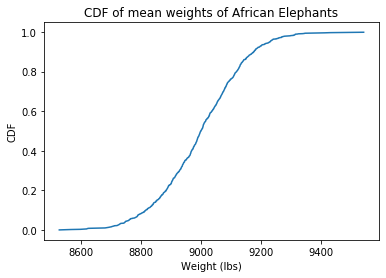

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# let's create the cumulative distribution function for the random sample

rm = sorted(random_means)
count = 0
cdf_dict = {rm[0]: count/len(rm)}

for i in range(1, len(rm)):
    if rm[i] > rm[i-1]:
        count += 1
        cdf_dict[rm[i]] = count/len(rm)
    
    else:
        count += 1

        
plt.plot(list(cdf_dict.keys()), list(cdf_dict.values()))
plt.title("CDF of mean weights of African Elephants")
plt.xlabel('Weight (lbs)')
plt.ylabel('CDF')

plt.plot()
plt.show();

In [7]:
# That looks similar to the cdf of a normal curve.

Now let's count how many times the means from the sample distribution were less than the mean weight of the Gabonese elephants.

In [9]:
count = 0
for mean in random_means:
    if mean <= 8637:
        count += 1
        
count/len(random_means)

0.009

In [9]:
# That is below our alpha value of .05, so we can reject the null hypothesis!

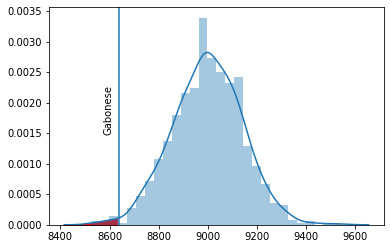

In [13]:
ax = sns.distplot(random_means)
plt.axvline(8637)
plt.text(8575, .0015, 'Gabonese', rotation = 90)

kde_x, kde_y = ax.lines[0].get_data()

ax.fill_between(kde_x, kde_y, where=(kde_x<8637), 
                interpolate=True, color='red')

In [10]:
# Let's calculate the standard error, which is how far we expect our estimate to be off on average. (111)

def mse(sample, mean):
    sq_errors = []

    for sample_mean in sample:
        sq_errors.append((sample_mean - mean)**2)

    return sum(sq_errors)/len(sample)

rmse = np.sqrt(mse(random_means, 9000))
f"We expect the estimate to be off by {rmse: .2f} lbs on average."


'We expect the estimate to be off by  141.34 lbs on average.'

Remember we gave the formula for standard error before as $\frac{\sigma}{\sqrt{n}}$
<br> Let's calculate that with our elephant numbers.

In [11]:
se = 900/np.sqrt(40)
se
# pretty close

142.30249470757707

Now let's calculate the z-score analytically.
Remember the formula for z-score:
$z = \dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

In [12]:
x_bar = 8637
mu = 9000
se = 142.3

z = (x_bar - mu)/se
z



-2.5509486999297257

In [2]:
# Looking it up on the z -table ~ .005 
p = 1 - .005
p

0.995

In [13]:
# or
from scipy import stats
stats.norm.cdf(z)

0.005371506876180296

In [15]:
# or
stats.norm.sf(z)

0.9946284931238197

# T-Tests

With z-tests, we knew the population standard deviation. What do we do when that is unknown?  That is where T-tests come in.  

T-tests substitute the sample's standard deviation for the population standard deviation.   

The central limit theorem says that a sampling distribution will be approximately normal if the sample size is large enough.  That is great! But that also implies that sampling distributions of smaller sample sizes may not be normal.  



### T vs Z

A t-test is like a modified z-test:
- Penalize for small sample size - “degrees of freedom”
- Use sample std. dev. s to estimate population σ

![img5](./img/img5.png)

### T and Z in detail
![img4](./img/img4.png)

As the degrees of freedom go up, the t-distribution gets closer to the normal curve.

With sample sizes below 30, we will use a t-test.

After calculating our t-stat, we compare it against our t-critical value determined by our preditermined alpha and the degrees of freedom.

Degrees of freedom = n - 1
### T-value table

![img6](./img/img6.png)

We can either look it up (http://www.ttable.org/), or calculate it with python:

In [19]:
from scipy.stats import ttest_1samp
help(ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        sample observation
    popmean : float or array_like
        expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.

Let's go back to our Gabonese elephants, but let's reduce the sample size to 20, and assume we don't know the standard deviation of the population, but know the sample standard deviation to be ~355 lbs.

Here is the new scenario: suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs. Pachyderm Adventures has recently measured the weights of 20 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

Because the sample size is smaller, we will use a one sample t-test.

In [20]:
# here is the array of our weights
gab = [8000, 8500, 8787, 9005, 8101, 
8891, 7999, 9005, 8302, 8505, 
8787, 8383, 9090, 8440, 9200, 
8890, 8765, 9005, 8674, 8409]
print(np.std(gab))
print(np.mean(gab))


355.2156950361287
8636.9


In [21]:
# Let's continue to assume our alpha is .05
x_bar = 8637
mu = 9000
sample_std = 355
n = 20

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n))
t_stat

-4.57291648356295

In [22]:
# Calculate our t-critical value
stats.t.ppf(.05, 19)

-1.7291328115213678

Now, let's use the t-table to find our critical t-value.
t-critical = -1.729


In [23]:
# Using Python:
ttest_1samp(gab, 9000)

Ttest_1sampResult(statistic=-4.455648296279936, pvalue=0.0002711592272563807)

So, yes, we can very confidently reject our null.


# Two sample t-test

Now let's say we want to compare our Gabonese elephants to a sample of elephants from Kenya. 

In [25]:
ken = [9101, 8510, 8787, 9005, 8101, 
9100, 7900, 9005, 8302, 8505, 
9200, 8383, 9090, 8440, 9110, 
9300, 9200, 8901, 8701, 9308]
print(np.mean(ken))
print(np.std(ken))

8797.45
407.0733932597413


In order to test whether these samples are actually from different populations, we use a two-sample t-test.  The test-statistic here is calculated a bit differently

When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

$s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

$s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [26]:
# so

x_1 = np.mean(gab)
x_2 = np.mean(ken)
s_1_2 = np.var(gab, ddof = 1)
s_2_2 = np.var(ken, ddof = 1)
n_1 = len(gab)
n_2 = len(ken)
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)

t = (x_1 - x_2)/np.sqrt(s_p_2*(1/n_1 + 1/n_2))
t

-1.295328080596772

In [27]:
from scipy.stats import ttest_ind
ttest_ind(gab, ken, equal_var = False)

Ttest_indResult(statistic=-1.295328080596772, pvalue=0.20316363512390417)